In [3]:
import func_agent.agent as agent

import func_repository.repository as repository

from openai import OpenAI


In [2]:
repo = repository.Repository()
repo.functions

[<function func_repository.descriptions.d_get_coordinates_by_city(city: str)>,
 <function func_repository.descriptions.d_get_current_weather(city: str)>,
 <function func_repository.descriptions.d_send_email_to(recipient: str, content: str, subject: str)>]

In [3]:
agent = agent.Agent(model='gpt-3.5-turbo', functions=repo.functions)
response = agent.ask('What is the weather in Freiburg?')

.

In [5]:
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "What is the weather in Freiburg?"}]
)

In [7]:
response.choices[0].message.content

"I'm sorry, I am unable to provide real-time weather updates. You can check the current weather in Freiburg by using a weather website or app like Weather.com or AccuWeather."

In [7]:
response.choices[0].finish_reason

'function_call'

In [4]:
agent.functions

[{'name': 'd_get_coordinates_by_city',
  'description': 'provides coordinates of a given city',
  'parameters': {'type': 'object',
   'properties': {'city': {'description': 'name of the city',
     'type': 'string'}}},
  'required': ['city']},
 {'name': 'd_get_current_weather',
  'description': 'provides current weather data for a given city',
  'parameters': {'type': 'object',
   'properties': {'city': {'description': 'name of the city',
     'type': 'string'}}},
  'required': ['city']},
 {'name': 'd_send_email_to',
  'description': 'sends an email to a given recipient',
  'parameters': {'type': 'object',
   'properties': {'recipient': {'description': 'email address of the recipient',
     'type': 'string'},
    'content': {'description': 'content of the email to be sent',
     'type': 'string'},
    'subject': {'description': 'subject of the email to be sent',
     'type': 'string'}}},
  'required': ['recipient', 'content', 'subject']}]

In [ ]:
import inspect
import func_repository.descriptions as desc

ls_func = []    

for name, obj in inspect.getmembers(desc):
    if inspect.isfunction(obj) and name.startswith('d_'): 
        print(obj)
        ls_func.append(obj)



In [ ]:
ls_func

In [ ]:
import os
import base64
from email.message import EmailMessage
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

def send_email_to(recipient: str, content: str, subject: str):
    CLIENT_FILE = 'account_01.json'
    SCOPES = ['https://mail.google.com/']

    creds = None

    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)

    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(CLIENT_FILE, SCOPES)
            creds = flow.run_local_server(port=0)
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

        service = build('gmail', 'v1', credentials=creds)

    message = EmailMessage()
    message.set_content(content)
    message['To'] = recipient
    message['From'] = 'nick.reiter6.11.98@gmail.com'
    message['Subject'] = subject

    raw_string = base64.urlsafe_b64encode(message.as_bytes()).decode()

    create_message = {'raw': raw_string}

    send_message = (
            service.users()
            .messages()
            .send(userId="me", body=create_message)
            .execute()
        )

    return send_message

        

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

class DirectedGraph:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_edge(self, start, end):
        self.graph.add_edge(start, end)

    def display(self):
        pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos, with_labels=True, arrows=True)
        plt.show()

# Example usage:


In [1]:
from workfl_agent.agent import Agent as WAgent

In [2]:
wagent = WAgent()


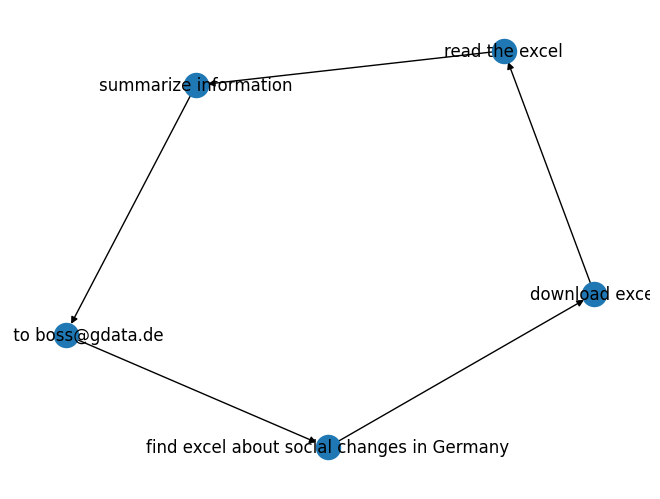

In [6]:
import json
res = wagent.ask('Can you please help me? Find a cool excel including data about social changes in Germany in the internet. Download it and then read read it again. Then the information should be summarized. Subsequently send to my boss boss@gdata.de. Repeat from the beginning')
graph_representation = json.loads(res)


graph = DirectedGraph()

for key in graph_representation:
    values = graph_representation[key]
    for value in values:
        graph.add_edge(key, value)

graph.display()

In [21]:
graph_representation

{'find a cool excel including data about social changes in Germany in the internet': ['download the excel'],
 'download the excel': ['read the excel', 'summarize the information'],
 'read the excel': ['summarize the information'],
 'summarize the information': ['send to boss@gdata.de']}

In [29]:
res

"{\n    'find social changes data in Germany': ['download excel'], \n    'download excel': ['read the excel'], \n    'read the excel': ['summarize the information'], \n    'summarize the information': ['send email to boss@gdata.de']\n}"